In [1]:
#importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset

missing_value=[np.nan,"Unknown"]
df= pd.read_csv("TaxiData.csv",na_values=missing_value)

# Clean the data and handle missing values and columns
df=df.drop('pickup_census_tract',axis=1)
df.dropna(axis=1,how='all') # Removed only those values in which entire row is null

numerical_cols= ['pickup_community_area', 'fare', 'trip_start_month', 'trip_start_hour', 'trip_start_day', 'trip_start_timestamp', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'trip_miles', 'dropoff_census_tract', 'trip_seconds', 'dropoff_community_area', 'tips']
df[numerical_cols] = df[numerical_cols].interpolate()

df[[ 'dropoff_census_tract', 'payment_type', 'company']] = df[['dropoff_census_tract', 'payment_type', 'company']].fillna(method='ffill').fillna(method='bfill')

myDATA=[ 'pickup_community_area', 'dropoff_community_area', 'pickup_latitude',	'pickup_longitude',	'dropoff_latitude','dropoff_longitude']
df[myDATA] = df[myDATA].fillna(method='ffill').fillna(method='bfill')


## Q 4.a Outliers in Fare and Tips


### Q 4.a.a Use box plots to identify outliers in fare and tip values.

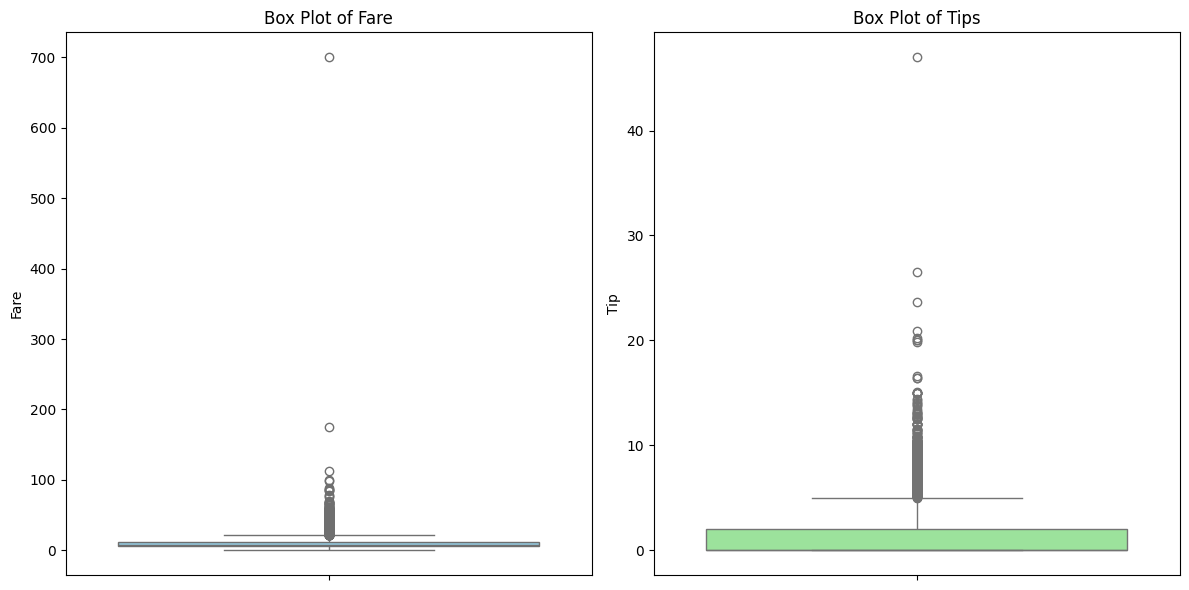

In [3]:
plt.figure(figsize=(12, 6))

# Box plot for Fare
plt.subplot(1, 2, 1)
sns.boxplot(y=df['fare'], color='skyblue')
plt.title('Box Plot of Fare')
plt.ylabel('Fare')

# Box plot for Tip
plt.subplot(1, 2, 2)
sns.boxplot(y=df['tips'], color='lightgreen')
plt.title('Box Plot of Tips')
plt.ylabel('Tip')

plt.tight_layout()
plt.show()

### Q 4.a.b Discuss how these outliers might skew average calculations


### Analysis of Fare and Tip Outliers

**Outliers Identified**  
- **Fare**: Extreme outlier at ~$700 (source: plot above)
- **Tip**: Extreme outlier at ~$45 (source: plot above)

1. **Fare Distribution**:
   - Median fare: ~$20-30
   - Multiple outliers, with several around $100-200 and one extreme at ~$700
   - Main concentration: $0-50

2. **Tip Distribution**:
   - Median tip: ~$2-5
   - Outliers range from $10-30, with an extreme around $45
   - Main concentration: $0-10

**Impact on Averages**:  
Outliers can skew the mean by pulling it towards extreme values, making it less representative of central tendency. For example, if typical values are near 10 but include an outlier at 1000, the mean will increase disproportionately, similar to the effect on variance estimates.


### Q 4.a.c Suggest methods for handling these outliers in predictive models (e.g., removal or adjustment)


### Outlier Handling Techniques

1. **Outlier Removal** : Remove data points with z-scores > ±3 or those beyond 1.5 * IQR (above Q3 or below Q1)

2. **Impute Outliers** : Replace outliers with the mean or median or nearest neighbor techniques

3. **Use Robust Models**
   - Tree-based models like decision trees and random forests are less sensitive to outliers.
   - Robust regression techniques like Huber, Ridge, or Lasso are less impacted by extreme values.

## Q 4.b Predicting Fare



### Q 4.b.a Implement a regression model using distance, trip duration, and location as predictors to estimate fares

In [4]:

#selecting the required features for regression
X = df[['trip_miles', 'trip_seconds', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 
                                                                    "dropoff_community_area", "pickup_community_area"]]
y = df['fare']


In [5]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#Fitting linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Q 4.b.b Model Evaluation: Present metrics such as RMSE to assess model accuracy

In [7]:
# Make predictions and evaluate the model
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Mean Squared Error: 32.18
R-squared: 0.67
Root Mean Squared Error (RMSE): 5.67


### Q 4.b.c Discuss the effectiveness of the model, noting any potential limitations or areas for improvement.

### Limitations
1. **Linearity Assumption**: Assumes a linear relationship, which may not fully capture real-world patterns.
2. **Data Quality**: Data errors can adversely impact predictions.
3. **Spatial Effects**: Direct use of latitude and longitude may miss complex urban geography effects on fares.

### Areas for Improvement
1. **Feature Engineering**: Add time of day, traffic, and weather data for improved predictions.
2. **Non-Linear Models**: Consider polynomial regression or decision trees to capture non-linear patterns.
3. **Validation Techniques**: Apply cross-validation to enhance model generalizability.